In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from algorithms.mean_based import mean_based
from algorithms.volatility_based import volatility_based
from algorithms.correlation_based import correlation_based
from visualizations.grouped_bar_chart import grouped_bar_chart

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def grouped_bar_chart(df, streams, start_date, end_date):
    """
    Create a grouped bar chart for the specified streams, grouping by minute.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data with a 'created_at' column and numeric fields.
    streams : list of str
        List of column names (streams) to plot.
    start_date : str or datetime
        Start datetime (e.g., '2025-03-18 06:54:00').
    end_date : str or datetime
        End datetime (e.g., '2025-03-18 06:59:59').

    Returns:
    --------
    None
        Displays the grouped bar chart.
    """
    # Convert 'created_at' to datetime and remove timezone to make it naive
    df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_localize(None)

    # Filter the DataFrame based on the provided date range
    mask = (df['created_at'] >= pd.to_datetime(start_date)) & (df['created_at'] <= pd.to_datetime(end_date))
    df_filtered = df.loc[mask].copy()

    # Create a new column that floors the timestamp to the minute for grouping
    df_filtered['minute'] = df_filtered['created_at'].dt.floor('min')

    # Group by minute and aggregate the streams (using sum; change to mean() if desired)
    grouped_data = df_filtered.groupby('minute')[streams].sum().reset_index()

    # Create x positions for each minute group
    x = np.arange(len(grouped_data))
    width = 0.8 / len(streams)  # Adjust width so that all bars in a group fit nicely

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each stream as a set of bars with an offset
    for i, stream in enumerate(streams):
        ax.bar(
            x + i * width,
            grouped_data[stream],
            width,
            label=stream
        )

    # Set x-ticks in the middle of each group
    ax.set_xticks(x + (len(streams) - 1) * width / 2)
    # Format the minute as a string (e.g., '06:54')
    ax.set_xticklabels(grouped_data['minute'].dt.strftime('%H:%M'))

    ax.set_xlabel('Time (Minute)')
    ax.set_ylabel('Aggregated Value')
    ax.set_title('Grouped Bar Chart by Minute')
    ax.legend(title='Streams')

    plt.tight_layout()
    plt.show()


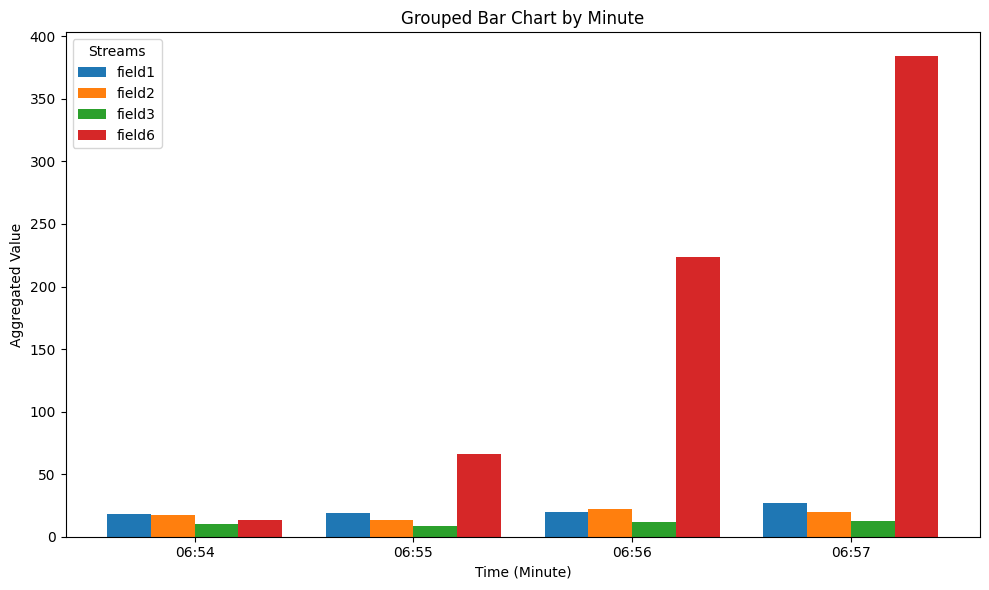

In [21]:
grouped_bar_chart(df, streams_to_check, start_date, end_date)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from algorithm import correlation_based

# --- Read and process sample data ---
# Assume the file 'thingspeak_dataset.csv' has the following structure:
# created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
df = pd.read_csv('datasets/2881821.csv', parse_dates=['created_at'])
df.sort_values(by='created_at', inplace=True)
df.set_index('created_at', inplace=True)
df = df.interpolate()

# --- Example usage of the detect_outlier_streams function ---
# Choose at least 3 streams for analysis, for example: field1, field2, field3, field5
streams_to_check = ['field1', 'field2', 'field3','field6']
start_date = '2025-03-18 06:54:00'
end_date = '2025-03-18 06:58:00'

results = volatility_based(df, streams_to_check, start_date, end_date)

print("\nOutlier detection results:")
print(results)


Volatility (std) of each stream (inverted):
field1    -1.709701
field2    -1.231456
field3    -1.010277
field6   -37.640944
dtype: float64

Outlier threshold: -28.562339587121162

Suspected outlier streams (abnormal volatility):
field6   -37.640944
dtype: float64

Outlier detection results:
{'field1': {'avg_corr': -1.7097008285302207, 'is_outlier': False}, 'field2': {'avg_corr': -1.231455852429764, 'is_outlier': False}, 'field3': {'avg_corr': -1.0102768633693147, 'is_outlier': False}, 'field6': {'avg_corr': -37.640943922020064, 'is_outlier': True}}


In [15]:
# df['created_at'] = pd.to_datetime(df['created_at'])
print(df.columns)

Index(['entry_id', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6',
       'field7', 'field8'],
      dtype='object')


In [18]:
df = pd.read_csv('datasets/2881821.csv', parse_dates=['created_at'])
print(df.columns)
df['created_at'] = pd.to_datetime(df['created_at'])

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8'],
      dtype='object')
